# Titanic Survival Prediction

## 1. Business Problem


### 1.1 Description 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### 1.2 Problem Statement

In this challenge, our task is to answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### 1.3 Source / useful links

Source : Titanic: Machine Learning from Disaster( https://www.kaggle.com/c/titanic/overview )

Useful links :
- https://github.com/ashishpatel26/Titanic-Machine-Learning-from-Disaster/

- https://www.kaggle.com/rahulsingh731/titanic-dataset-easy-eda-for-beginners

### 1.4 Real World / Business Objectives and Constraints 

1) Our job to predict if a passenger survived the sinking of the Titanic or not.
For each datapoint in test set, we must predict a 0 or 1 value.

2) No strict latency constraints.


## 2. Machine Learning problem


### 2.1 Data 

### 2.1.1 Data Overview


The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

Number of train datapoints : 891 
Size of train data: 59.76 KB

Number of test datapoints : 418 
Size of test data: 27.96 KB

### Data Field Explaination

Variable   Definition


1) survival	: 	0 = No, 1 = Yes 

2) pclass : Ticket class	1st = Upper, 2nd = Middle, 3rd = Lower

3)sex	

4) Age

5) sibsp	: The dataset defines family relations in this way (# of siblings / spouses aboard the Titanic)
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)



6) parch :	The dataset defines family relations in this way( # of parents / children aboard the Titanic)

- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

7) ticket	: Ticket number	

8) fare	: Passenger fare	

9) cabin: Cabin number	

10) embarked	: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

11) PassengerId : A unique id is given to each passenger

12)Name : Name of passenger


### 2.1.2 Example Data point

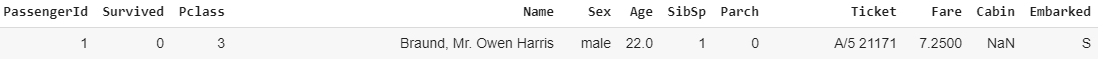

### 2.2 Mapping the real-world problem to a Machine Learning Problem


### 2.2.1 Type of Machine Learning Problem

This is binary classification Problem

### 2.2.2 Performance metric

Accuracy : Accuracy Score is the percentage of passengers predicted correctly.

# 3. Exploratory Data Analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 3.1 Data Loading 

In [ ]:
train=pd.read_csv('/content/drive/My Drive/Titanic/train.csv')
test=pd.read_csv('/content/drive/My Drive/Titanic/test.csv')

In [ ]:
print("Number of data points in train data : ",train.shape[0]) 
print("Number of data points in test data : ",test.shape[0]) 

Number of data points in train data :  891
Number of data points in test data :  418


In [ ]:
print("\nNumber of columns in data : ",train.columns) 


Number of columns in data :  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
print("Sample train datapoint :") 
train.head(5)

Sample train datapoint :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print("Sample test datapoint :") 
test.head(5)

Sample test datapoint :


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Analysis

Number of died passengers : 549 ( 61.61616161616161 % )
Number of survived passengers : 342 ( 38.38383838383838 % )



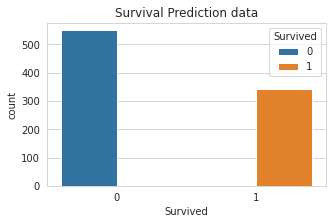

In [ ]:
class_specific_count = train['Survived'].value_counts()

print("Number of died passengers :", class_specific_count[0],"(",((class_specific_count[0]/len(train))*100),"% )")
print("Number of survived passengers :",class_specific_count[1], "(",((class_specific_count[1]/len(train))*100),"% )\n")

plt.figure(figsize=(5,3))
plt.title("Survival Prediction data")
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Survived',data=train)
plt.show()

**Observation** : 

1)In train data ,there are only 38% passengers were survived and 61% is of passengers lost their lives.

2) Clearly,survived passengers are less than died ones.

### Let's Visualise which values are missing the most

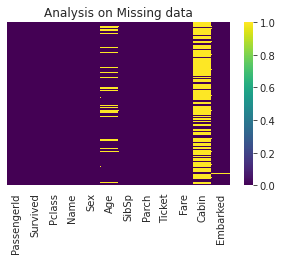

In [ ]:
#train data
plt.figure(figsize=(5,3))
plt.title("Analysis on Missing data")
sns.heatmap(train.isnull(),yticklabels=False ,cbar=True ,cmap='viridis')

**Observation** :In train data , We can see that Age and Cabin columns have most missing values and In Embarked column some values are missing.

In [ ]:
# To find how many null values in some columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observation** :In train data , We can see that Age and Cabin columns have most missing values and In Embarked column 2 values are missing.

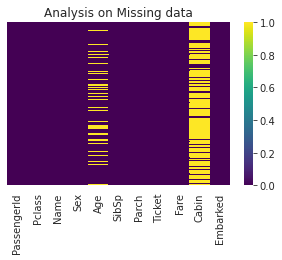

In [ ]:
#test data
plt.figure(figsize=(5,3))
plt.title("Analysis on Missing data")
sns.heatmap(test.isnull(),yticklabels=False ,cbar=True ,cmap='viridis')

**Observation** : In test data Age ,Cabin have most missing values.

In [ ]:
# To find how many null values 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Observation** : In test data Age ,Cabin have most missing values and Fare feature has only one missing value.

### Fill Missing Values : we fill missing values in Age column

In [ ]:
# fill NaN values 
train['Age'].fillna(train['Age'].median(),inplace=True)
train['Embarked'].fillna(method='pad',inplace=True)

test['Age'].fillna(test['Age'].median(),inplace=True)
test['Fare'].fillna(test['Fare'].median(),inplace=True)

Coming to the Cabin feature we can see that, more than 70% values are missing so the feature with 25% data is not useful to build robust model.Therefore we drop this feature from our dataset.

At the same time we drop other irrelevant columns like PassengerId,Name,Ticket.

In [ ]:
#drop columns which seems irrelevant 
train = train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
test = test.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [ ]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


## Features visualisations

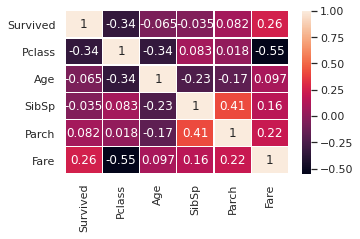

In [ ]:
# correlation visualisation using heatmap
sns.set(style='darkgrid')
fig=plt.figure(figsize=(5,3))
sns.heatmap(train.corr(),annot=True,linewidths=0.3)

**Observation** : 

1)It showing that Parch feature has some relationship with SibSp feature.

2) Fare feature has some dependency on Survival of passengers.we can think like if fare is taken from passenger is more then more lifeboats are assigned to these passengers.

3) Fare feature is connected to SibSp and Parch features.Because if passenger is travelling with his siblings,spouse,parents,childrens then his fare amount will be high.

4) Another one is connection between Age and Fare.As age increases people earn more money so they spend more.

# Bar Plot

In [ ]:
cat_cols = ['Pclass','Sex','Embarked','SibSp','Parch']

num_cols = ['Age','Fare']

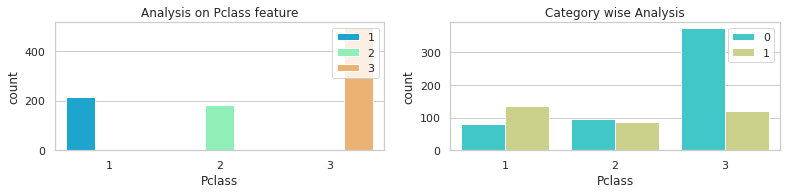

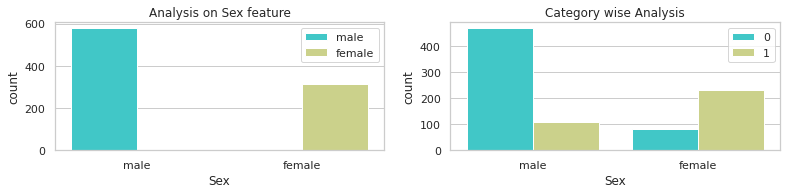

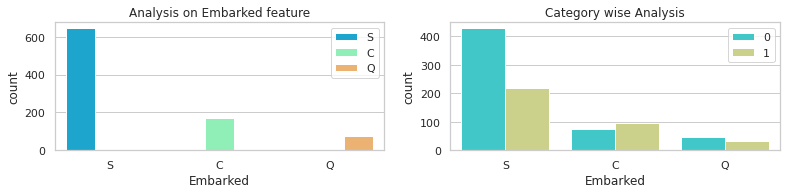

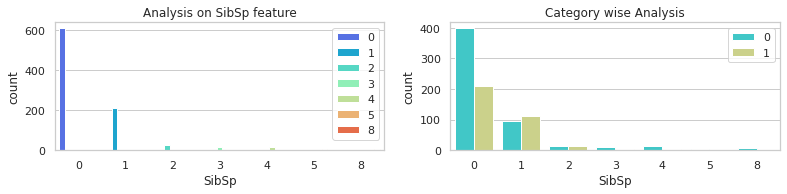

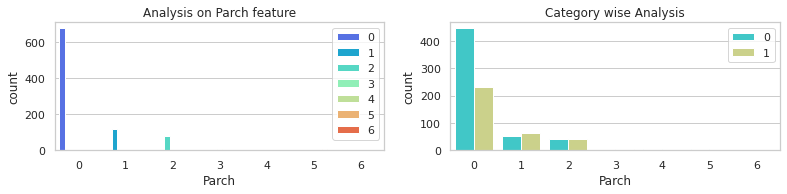

In [ ]:
for col in cat_cols:
  plt.figure(figsize=(13,8))
  
  plt.subplot(3,3,1)
  sns.set_style('whitegrid')
  plt.title("Analysis on {0} feature".format(col))
  sns.countplot(x=col,hue=col,data=train,palette='rainbow')
  plt.legend(loc=1)

  plt.subplot(3,2,2)
  sns.set_style('whitegrid')
  plt.title("Category wise Analysis".format(col))
  sns.countplot(x=col,hue='Survived',data=train,palette='rainbow')
  plt.legend(loc=1)

**Observation**: 

- Pclass Feature: 

 - 1)Here passengers with Pclass=1 were survived more than other class passengers.

 - 2)passengers with pclass=3 were died more than other classes.

 - 3) Many passengers were from pclass=3.


- Sex Feature:

 - 1) Survival rate of female were more as compared to male during the incident.

 - 2) In titanic disaster, more male were died as compared to female.

 - 3)more than 60% passengers were male.

- Embarked Feature:

 - 1)Passengers who started journey from S(Southampton) were survived and died more than the passengers embarked from C(Cherbourg)and Q(Queenstown).

 - 2)more than 65% passengers were started journey from S(Southampton) location.

- SibSp Feature

 - 1) More than 95% passengers were started journey with 0 or 1 SibSp.

 - 2)Passengers who started journey with 0 or 1 SibSp were survived and died more than the passengers with more than 1 SibSp.


- Parch

 - 1) More than 95% passengers were started journey with 0/1/2 Parch.

 - 2)Passengers who started journey with 0 Parch were survived and died more than the passengers with more than 1 Parch.

Text(12.296451678240743, 0.5, 'Ratio')

<Figure size 936x576 with 0 Axes>

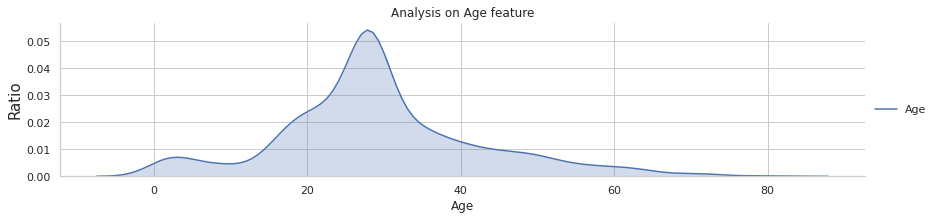

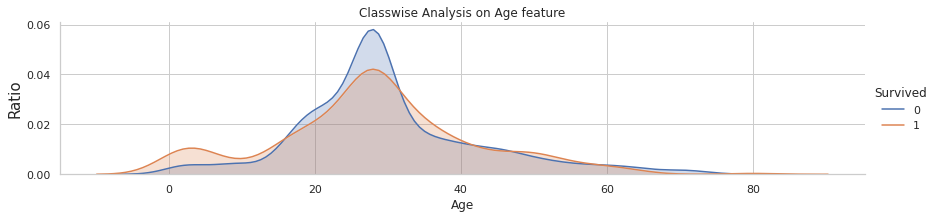

In [ ]:
plt.figure(figsize=(13,8))

sns.FacetGrid(train,aspect=4).map(sns.kdeplot,'Age',shade= True).add_legend() 
plt.title("Analysis on Age feature")
plt.ylabel('Ratio',fontsize=15) 

sns.FacetGrid(train, hue="Survived",aspect=4).map(sns.kdeplot,'Age',shade= True).add_legend()
plt.title("Classwise Analysis on Age feature") 
plt.ylabel('Ratio',fontsize=15) 

**Observation** : 

1) Many of passengers were 30 years old.

2) Those who were 20 to 40 years old were more dead and more survived.

3) Younger passengers tends to survive.

4)Ages of both the categories are overlapping,we can not distinguish survived passengers from died passengers.

Text(12.296451678240743, 0.5, 'Ratio')

<Figure size 936x576 with 0 Axes>

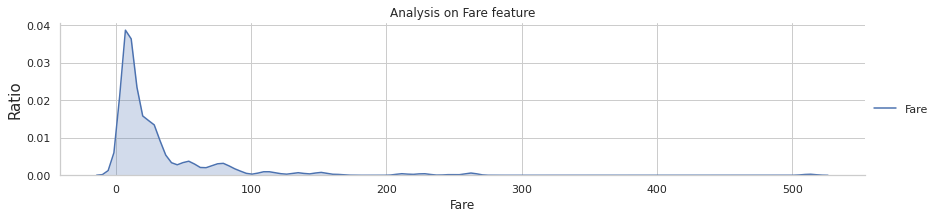

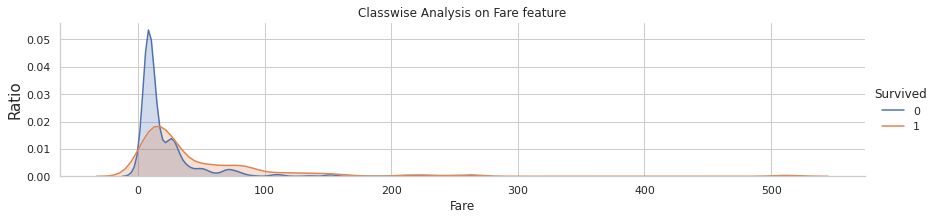

In [ ]:
plt.figure(figsize=(13,8))

sns.FacetGrid(train,aspect=4).map(sns.kdeplot,'Fare',shade= True).add_legend() 
plt.title("Analysis on Fare feature")
plt.ylabel('Ratio',fontsize=15) 

sns.FacetGrid(train, hue="Survived",aspect=4).map(sns.kdeplot,'Fare',shade= True).add_legend()
plt.title("Classwise Analysis on Fare feature") 
plt.ylabel('Ratio',fontsize=15) 

**Observation** : 

1) Many of passengers were given fare amount < 50.

2)Many of survived passengers were given 0-100 fare.

3) Distributions of both the passengers are overlapping so we can not distinguish further.

# Feature engineering

In [ ]:
sex_mapping = {"male": 0, "female": 1}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [ ]:
embarked_mapping = {'S':0,'C':1,'Q':2}

train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

### Binning

Binning/Converting Numerical Age to Categorical Variable

Feature vector map:

- child: 0


- young: 1


- adult: 2


- mid-age: 3


- senior: 4

In [ ]:
data=[train,test]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [ ]:
for dataset in data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[dataset['Fare'] >= 100, 'Fare'] = 3

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,0.0,1,0,0.0,0
1,1,1,1,0.0,1,0,2.0,1
2,1,3,1,0.0,0,0,0.0,0
3,1,1,1,0.0,1,0,2.0,0
4,0,3,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...
886,0,2,0,0.0,0,0,0.0,0
887,1,1,1,0.0,0,0,1.0,0
888,0,3,1,0.0,1,2,1.0,0
889,1,1,0,0.0,0,0,1.0,1


In [ ]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,0.0,0,0,0.0,2
1,3,1,0.0,1,0,0.0,0
2,2,0,0.0,0,0,0.0,2
3,3,0,0.0,0,0,0.0,0
4,3,1,0.0,1,1,0.0,0
...,...,...,...,...,...,...,...
413,3,0,0.0,0,0,0.0,0
414,1,1,0.0,0,0,3.0,1
415,3,0,0.0,0,0,0.0,0
416,3,0,0.0,0,0,0.0,0


### Family Size

In [ ]:
train["FamilySize"] = train["SibSp"] + train["Parch"]
test["FamilySize"] = test["SibSp"] + test["Parch"]

In [ ]:
train= train.drop(['SibSp','Parch'],axis=1,inplace=False)

In [ ]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,0.0,0.0,0,1
1,1,1,1,0.0,2.0,1,1
2,1,3,1,0.0,0.0,0,0
3,1,1,1,0.0,2.0,0,1
4,0,3,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,0.0,0.0,0,0
887,1,1,1,0.0,1.0,0,0
888,0,3,1,0.0,1.0,0,3
889,1,1,0,0.0,1.0,1,0


In [ ]:
test= test.drop(['SibSp','Parch'],axis=1,inplace=False)

In [ ]:
test

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,0.0,0.0,2,0
1,3,1,0.0,0.0,0,1
2,2,0,0.0,0.0,2,0
3,3,0,0.0,0.0,0,0
4,3,1,0.0,0.0,0,2
...,...,...,...,...,...,...
413,3,0,0.0,0.0,0,0
414,1,1,0.0,3.0,1,0
415,3,0,0.0,0.0,0,0
416,3,0,0.0,0.0,0,0
